In [1]:
import numpy as np
import scipy.signal
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
from scipy.optimize import minimize
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
import lattice.lattice as lattice
from lattice.summary_in_undulator import get_summary_in_undulator
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
waveforms_dir = shift_03_10_2020.get_waveforms_dir()
results_dir = shift_03_10_2020.get_results_dir()
fluctuations_df = shift_03_10_2020.get_fluctuations_df("res_df_nd_filters_data_plus_acnet_03_10_2020.csv")
lattice_file = shift_03_10_2020.get_6dsim_dir().fi("IOTA_1NL_100MeV_v8.6.1.3.6ds_data.txt")
t1 = datetime(2020, 3, 10, 11, 32, 0)
t2 = datetime(2020, 3, 10, 12, 58, 0)
from fur.fluctuations_individual_periods import analyze_one_file

In [2]:
wf_paths = [p for p in shift_03_10_2020.get_waveform_paths() if
                (t1 < shift_03_10_2020.get_datetime(os.path.basename(p)) < t2)]
n_files = len(wf_paths)

In [3]:
indiv_fluct_df = pd.DataFrame()

In [4]:
for i,p in enumerate(wf_paths):
    status = "{}/{}".format(i+1,n_files)
    print("Started working on ", status)
    indiv_fluct_df[p] = analyze_one_file(p)
    print("Finished working on ", status)

Started working on  1/19
Finished working on  1/19
Started working on  2/19
Finished working on  2/19
Started working on  3/19
Finished working on  3/19
Started working on  4/19
Finished working on  4/19
Started working on  5/19
Finished working on  5/19
Started working on  6/19
Finished working on  6/19
Started working on  7/19
Finished working on  7/19
Started working on  8/19
Finished working on  8/19
Started working on  9/19
Finished working on  9/19
Started working on  10/19
Finished working on  10/19
Started working on  11/19
Finished working on  11/19
Started working on  12/19
Finished working on  12/19
Started working on  13/19
Finished working on  13/19
Started working on  14/19
Finished working on  14/19
Started working on  15/19
Finished working on  15/19
Started working on  16/19
Finished working on  16/19
Started working on  17/19
Finished working on  17/19
Started working on  18/19
Finished working on  18/19
Started working on  19/19
Finished working on  19/19


In [6]:
# indiv_fluct_df.to_csv(results_dir.fi("res_df_nd_filters_data_03_10_2020_indiv_fluct.csv"))

In [9]:
indiv_fluct_df = pd.read_csv(results_dir.fi("res_df_nd_filters_data_03_10_2020_indiv_fluct.csv"), index_col=0)

In [10]:
indiv_fluct_df.head()

,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_10_121356.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_11_121907.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_12_122451.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_13_123150.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_14_123409.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_15_123707.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_16_124126.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_17_124538.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_18_125040.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_19_125407.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_20_125657.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_2_113530.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_3_113943.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_4_114207.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_5_114546.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_6_114948.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_7_115153.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_8_115935.Wfm.bin,/mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/waveforms/RefCurve_2020-03-10_9_120443.Wfm.bin
0,135.408221,135.935023,115.063242,116.503955,116.424505,65.313320,65.302413,65.380670,28.665138,28.444348,28.626798,252.625496,208.212650,208.290909,208.707901,163.772018,164.702289,165.642685,136.813280
1,0.485217,0.500790,0.338656,0.286324,0.507747,0.240988,0.068775,0.215850,0.342688,0.122885,0.069091,0.866166,0.857945,0.832055,0.889012,0.663715,0.548617,0.559644,0.392727
2,0.457905,0.628182,0.324111,0.310751,0.196601,0.329328,0.287668,0.150474,0.080356,0.044506,0.246206,1.376917,0.868498,0.743794,0.558617,0.635771,0.610672,0.465178,0.419289
3,0.624506,0.630079,0.574427,0.189842,0.469289,-0.022569,0.001818,0.251146,-0.100000,0.217312,-0.055968,0.537629,0.495415,0.798063,1.029170,0.609328,0.533873,0.730830,0.446008
4,0.539881,0.545810,0.362332,0.488261,0.256364,0.317984,0.275771,-0.061581,0.151344,0.014308,0.012134,0.853281,0.641779,0.795652,0.855771,0.416719,0.521937,0.387707,0.470830


In [33]:
fluct_summary_df = pd.DataFrame(index=range(len(indiv_fluct_df.columns)))

In [34]:
fluct_summary_df["file_path"] = indiv_fluct_df.columns.values

In [35]:
fluct_summary_df["ch2_integral"] = indiv_fluct_df.loc[0,:].values

In [36]:
fluct_summary_df["ch1_integral_variance"] = indiv_fluct_df.apply(lambda col: col[1:].dropna().std()**2).values

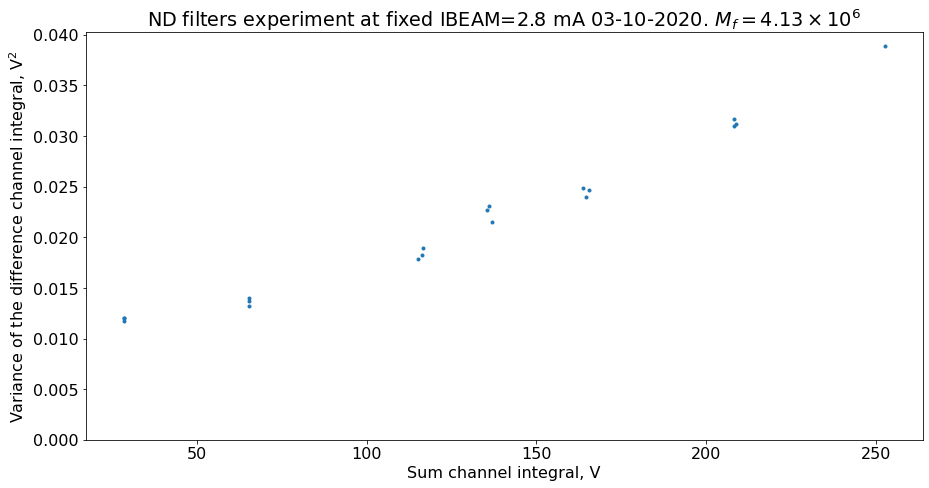

In [41]:
fig, ax = plt.subplots()
ax.plot(fluct_summary_df["ch2_integral"],fluct_summary_df["ch1_integral_variance"] ,'.')
ax.set_xlabel("Sum channel integral, V")
ax.set_ylabel("Variance of the difference channel integral, V$^2$")
ax.set_title(r"ND filters experiment at fixed IBEAM=2.8 mA 03-10-2020. $M_f=4.13\times 10^6$")
ax.set_ylim(0, ax.get_ylim()[1])
plt.show()